In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Nov 30 04:11:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              41W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
load_train_1=pd.read_csv('/content/drive/MyDrive/NLP_Masters/Project/quora-question-pairs 2/train.csv')
load_train = load_train_1#.sample(frac=0.01)

In [ ]:
load_train.describe()

id           qid1           qid2   is_duplicate
count  404290.000000  404290.000000  404290.000000  404290.000000
mean   202144.500000  217243.942418  220955.655337       0.369198
std    116708.614502  157751.700002  159903.182629       0.482588
min         0.000000       1.000000       2.000000       0.000000
25%    101072.250000   74437.500000   74727.000000       0.000000
50%    202144.500000  192182.000000  197052.000000       0.000000
75%    303216.750000  346573.500000  354692.500000       1.000000
max    404289.000000  537932.000000  537933.000000       1.000000

In [ ]:
load_train.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [ ]:
load_test = pd.read_csv('/content/drive/MyDrive/NLP_Masters/Project/quora-question-pairs 2/test.csv')

In [ ]:
load_test.head()

test_id                                          question1  \
0        0  How does the Surface Pro himself 4 compare wit...   
1        1  Should I have a hair transplant at age 24? How...   
2        2  What but is the best way to send money from Ch...   
3        3                        Which food not emulsifiers?   
4        4                   How "aberystwyth" start reading?   

                                           question2  
0  Why did Microsoft choose core m3 and not core ...  
1        How much cost does hair transplant require?  
2                      What you send money to China?  
3                                  What foods fibre?  
4                     How their can I start reading?

In [ ]:
load_train.shape

(404290, 6)

In [ ]:
load_test.shape

(2345796, 3)

In [ ]:
'''from sklearn.utils import resample

majority_class_train = load_train[load_train['is_duplicate'] == load_train['is_duplicate'].mode()[0]]
minority_class_train = load_train[load_train['is_duplicate'] != load_train['is_duplicate'].mode()[0]]

minority_class_train_upsampled = resample(minority_class_train,
                                          replace=True,
                                          n_samples=len(majority_class_train),
                                          random_state=42)

# Combine the balanced classes back
train_df = pd.concat([majority_class_train, minority_class_train_upsampled])

# Check new class distribution after balancing
print(train_df['is_duplicate'].value_counts())'''

"from sklearn.utils import resample\n\nmajority_class_train = load_train[load_train['is_duplicate'] == load_train['is_duplicate'].mode()[0]]\nminority_class_train = load_train[load_train['is_duplicate'] != load_train['is_duplicate'].mode()[0]]\n\nminority_class_train_upsampled = resample(minority_class_train,\n                                          replace=True,\n                                          n_samples=len(majority_class_train),\n                                          random_state=42)\n\n# Combine the balanced classes back\ntrain_df = pd.concat([majority_class_train, minority_class_train_upsampled])\n\n# Check new class distribution after balancing\nprint(train_df['is_duplicate'].value_counts())"

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
'''train_df = load_train #.sample(frac=0.01, random_state=None)
train_df.shape'''

'train_df = load_train #.sample(frac=0.01, random_state=None)\ntrain_df.shape'

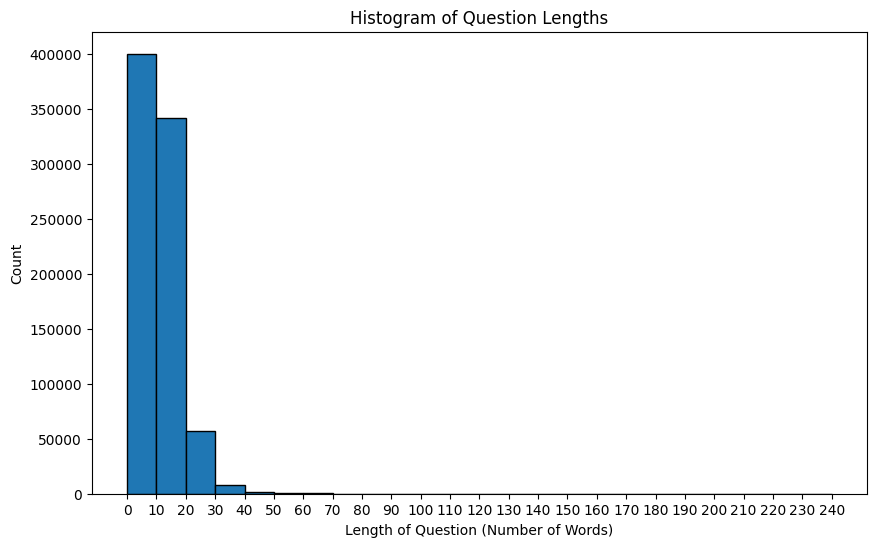

In [ ]:
# Calculate the length of each question
load_train['question1_length'] = load_train['question1'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
load_train['question2_length'] = load_train['question2'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Combine both question lengths into one series for histogram
question_lengths = pd.concat([load_train['question1_length'], load_train['question2_length']])

# Generate the histogram with updated x-axis steps
plt.figure(figsize=(10, 6))
plt.hist(question_lengths, bins=range(0, max(question_lengths) + 10, 10), edgecolor='black')
plt.xlabel('Length of Question (Number of Words)')
plt.ylabel('Count')
plt.title('Histogram of Question Lengths')
plt.xticks(range(0, max(question_lengths) + 10, 10))  # Set x-axis ticks for every 10 steps
plt.show()

In [ ]:
'''# Find the longest question by length in characters
load_train['question1_length'] = load_train['question1'].str.len()
load_train['question2_length'] = load_train['question2'].str.len()

# Find the maximum length in both questions
max_length_q1 = load_train['question1_length'].max()
max_length_q2 = load_train['question2_length'].max()

# Get the longest sentence
if max_length_q1 >= max_length_q2:
    longest_sentence = load_train.loc[load_train['question1_length'].idxmax(), 'question1']
else:
    longest_sentence = load_train.loc[load_train['question2_length'].idxmax(), 'question2']

print(f"The longest sentence is:\n{longest_sentence}")
print(f"Length of the longest sentence: {max(max_length_q1, max_length_q2)} characters")
'''

'# Find the longest question by length in characters\nload_train[\'question1_length\'] = load_train[\'question1\'].str.len()\nload_train[\'question2_length\'] = load_train[\'question2\'].str.len()\n\n# Find the maximum length in both questions\nmax_length_q1 = load_train[\'question1_length\'].max()\nmax_length_q2 = load_train[\'question2_length\'].max()\n\n# Get the longest sentence\nif max_length_q1 >= max_length_q2:\n    longest_sentence = load_train.loc[load_train[\'question1_length\'].idxmax(), \'question1\']\nelse:\n    longest_sentence = load_train.loc[load_train[\'question2_length\'].idxmax(), \'question2\']\n\nprint(f"The longest sentence is:\n{longest_sentence}")\nprint(f"Length of the longest sentence: {max(max_length_q1, max_length_q2)} characters")\n'

In [ ]:
#load_train = load_train.sample(frac=0.01, random_state=None)
#load_train.shape

In [ ]:
#load_test = load_test.sample(frac=0.01, random_state=None)
#load_test.shape

#### Note:
More test samples than train samples need to see if the model can get the generalised results

In [ ]:
print(load_train.isna().sum())

id                  0
qid1                0
qid2                0
question1           1
question2           2
is_duplicate        0
question1_length    0
question2_length    0
dtype: int64


In [ ]:
# dropping the missing values
load_train = load_train.dropna()

In [ ]:
load_train.shape

(404287, 8)

In [ ]:
print(load_test.isna().sum())

test_id      0
question1    2
question2    4
dtype: int64


In [ ]:
load_test = load_test.dropna()
load_test.shape

(2345790, 3)

## Visualisation

In [ ]:
import plotly.express as px

In [ ]:
#!pip install nbformat --upgrade

In [ ]:
fig = px.pie(load_train, values='id', names='is_duplicate', height=600, title='Proportion of Duplicate and Non Duplicate Questions')
fig.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

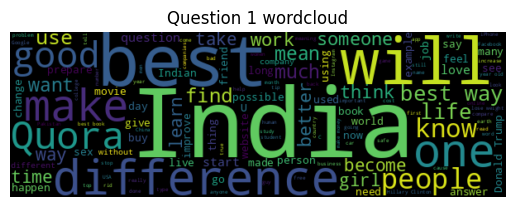

In [ ]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(load_train['question1']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Question 1 wordcloud")
plt.axis("off")
plt.show()

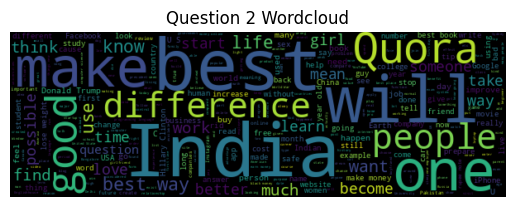

In [ ]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(load_train['question2']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Question 2 Wordcloud")
plt.axis("off")
plt.show()

In [ ]:
load_train.describe()

id           qid1           qid2   is_duplicate  \
count  404287.000000  404287.000000  404287.000000  404287.000000   
mean   202144.340337  217243.151093  220955.212082       0.369201   
std    116708.673691  157751.614317  159903.168488       0.482589   
min         0.000000       1.000000       2.000000       0.000000   
25%    101071.500000   74436.500000   74726.500000       0.000000   
50%    202145.000000  192181.000000  197053.000000       0.000000   
75%    303216.500000  346573.000000  354692.000000       1.000000   
max    404289.000000  537932.000000  537933.000000       1.000000   

       question1_length  question2_length  
count     404287.000000     404287.000000  
mean          10.942256         11.182017  
std            5.428812          6.305210  
min            1.000000          1.000000  
25%            7.000000          7.000000  
50%           10.000000         10.000000  
75%           13.000000         13.000000  
max          125.000000        237.000000

In [ ]:
load_train['question1'].describe()

count                                    404287
unique                                   290455
top       How do I improve my English speaking?
freq                                         50
Name: question1, dtype: object

In [ ]:
train_data_nxt, test_data = train_test_split(load_train, test_size=0.20, random_state=203, stratify=load_train['is_duplicate'])
#train_data, val_data = train_test_split(train_data_nxt, test_size=0.20, random_state=203, stratify=train_data_nxt['is_duplicate'])

In [ ]:
tp1=minority_class_train = train_data_nxt[train_data_nxt['is_duplicate'] == 1]

In [ ]:
tp1.shape

(119410, 8)

In [ ]:
tp2=minority_class_train = train_data_nxt[train_data_nxt['is_duplicate'] == 0]
tp2.shape

(204019, 8)

In [ ]:
#train_data_nxt.describe

In [ ]:
from sklearn.utils import resample

# Print the class distribution before balancing
print("Class distribution before balancing:")
print(train_data_nxt['is_duplicate'].value_counts())

# Correctly identify majority and minority classes
majority_class_train = train_data_nxt[train_data_nxt['is_duplicate'] == 0]  # Majority class (0)
minority_class_train = train_data_nxt[train_data_nxt['is_duplicate'] == 1]  # Minority class (1)

# Upsample the minority class (1) to match the majority class (0)
minority_class_train_upsampled = resample(
    minority_class_train,
    replace=True,  # Sample with replacement
    n_samples=len(majority_class_train),  # Match majority class size
    random_state=42  # Reproducibility
)

# Combine the upsampled minority class with the majority class
train_data_temp = pd.concat([majority_class_train, minority_class_train_upsampled])

# Shuffle the combined dataset
train_data_temp = train_data_temp.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the class distribution after balancing
print("Class distribution after balancing:")
print(train_data_temp['is_duplicate'].value_counts())


Class distribution before balancing:
is_duplicate
0    204019
1    119410
Name: count, dtype: int64
Class distribution after balancing:
is_duplicate
1    204019
0    204019
Name: count, dtype: int64


In [ ]:
train_data_temp.shape #this will be used for the classification

(408038, 8)

In [ ]:
train_data, val_data = train_test_split(train_data_temp, test_size=0.20, random_state=203, stratify=train_data_temp['is_duplicate'])

In [ ]:
train_data.shape

(326430, 8)

In [ ]:
val_data.shape

(81608, 8)

In [ ]:
test_data.shape #used for the model and for the results since test.csv doesnot have labels

(80858, 8)

In [ ]:
import plotly.express as px


In [ ]:
fig = px.pie(train_data, values='id', names='is_duplicate', height=600, title='Proportion of Duplicate and Non Duplicate Questions')
fig.show()

In [ ]:
fig = px.pie(test_data, values='id', names='is_duplicate', height=600, title='Proportion of Duplicate and Non Duplicate Questions')
fig.show()

#### Since our train data is not balanced we have to resample it

In [ ]:
#train_data

In [ ]:
test_data.describe()

id           qid1           qid2  is_duplicate  \
count   80858.000000   80858.000000   80858.000000  80858.000000   
mean   202085.791115  217663.217802  221327.365010      0.369203   
std    116687.874468  157602.673971  159593.661424      0.482592   
min         8.000000       3.000000      18.000000      0.000000   
25%    101036.000000   75175.250000   75574.000000      0.000000   
50%    202133.000000  193068.000000  197816.500000      0.000000   
75%    303074.750000  347013.750000  354555.000000      1.000000   
max    404285.000000  537926.000000  537927.000000      1.000000   

       question1_length  question2_length  
count      80858.000000      80858.000000  
mean          10.937186         11.178869  
std            5.450972          6.478811  
min            1.000000          1.000000  
25%            7.000000          7.000000  
50%           10.000000         10.000000  
75%           13.000000         13.000000  
max           73.000000        237.000000

In [ ]:
#train_data, val_data = train_test_split(train_data_nxt, test_size=0.20, random_state=203, stratify=train_data_nxt['is_duplicate'])

In [ ]:
'''from sklearn.utils import resample

# Print the class distribution before balancing
print("Class distribution before balancing:")
print(train_data['is_duplicate'].value_counts())

# Correctly identify majority and minority classes
majority_class_train = train_data[train_data['is_duplicate'] == 0]  # Majority class (0)
minority_class_train = train_data[train_data['is_duplicate'] == 1]  # Minority class (1)

# Upsample the minority class (1) to match the majority class (0)
minority_class_train_upsampled = resample(
    minority_class_train,
    replace=True,  # Sample with replacement
    n_samples=len(majority_class_train),  # Match majority class size
    random_state=42  # Reproducibility
)

# Combine the upsampled minority class with the majority class
train_df = pd.concat([majority_class_train, minority_class_train_upsampled])

# Shuffle the combined dataset
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the class distribution after balancing
print("Class distribution after balancing:")
print(train_df['is_duplicate'].value_counts())
'''

'from sklearn.utils import resample\n\n# Print the class distribution before balancing\nprint("Class distribution before balancing:")\nprint(train_data[\'is_duplicate\'].value_counts())\n\n# Correctly identify majority and minority classes\nmajority_class_train = train_data[train_data[\'is_duplicate\'] == 0]  # Majority class (0)\nminority_class_train = train_data[train_data[\'is_duplicate\'] == 1]  # Minority class (1)\n\n# Upsample the minority class (1) to match the majority class (0)\nminority_class_train_upsampled = resample(\n    minority_class_train,\n    replace=True,  # Sample with replacement\n    n_samples=len(majority_class_train),  # Match majority class size\n    random_state=42  # Reproducibility\n)\n\n# Combine the upsampled minority class with the majority class\ntrain_df = pd.concat([majority_class_train, minority_class_train_upsampled])\n\n# Shuffle the combined dataset\ntrain_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)\n\n# Print the class d

In [ ]:
train_data['question1_lens'] = train_data['question1'].apply(lambda x: len(x.split()))

In [ ]:
train_data['question1_lens'].describe()

count    326430.000000
mean         10.713338
std           5.194997
min           1.000000
25%           7.000000
50%           9.000000
75%          13.000000
max         125.000000
Name: question1_lens, dtype: float64

In [ ]:
train_data['question2_lens'] = train_data['question2'].apply(lambda x: len(x.split()))

In [ ]:
train_data['question2_lens'].describe()

count    326430.000000
mean         10.899326
std           5.901996
min           1.000000
25%           7.000000
50%           9.000000
75%          13.000000
max         237.000000
Name: question2_lens, dtype: float64

## Modelling

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling1D, BatchNormalization, Input, Lambda, add, Concatenate, Subtract, Multiply, LayerNormalization, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import tensorflow.keras.backend as K
import numpy as np

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
transformer_model = TFBertModel.from_pretrained("bert-base-uncased")
# Set transformer model to be non-trainable
transformer_model.trainable = False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
X = train_data[['question1', 'question2']]
y = train_data['is_duplicate']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
questions1 = X['question1'].astype(str)
questions2 = X['question2'].astype(str)

In [ ]:
# Lists to store individual question pair input ids and masks
input_ids_1 = []
attention_masks_1 = []
input_ids_2 = []
attention_masks_2 = []

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(1)
    tf.config.experimental_connect_to_cluster(tpu)
    print(2)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    print(3)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print(4)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")

except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 128
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

Running on 1 replicas
Batch Size: 128


In [ ]:
def encode_text(text, tokenizer):
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=40,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )
    input_ids = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {
        "input_ids": input_ids,
        "attention_masks": attention_masks
    }

In [ ]:
X1_train = encode_text(train_data['question1'].tolist(), tokenizer)
X2_train = encode_text(train_data['question2'].tolist(), tokenizer)
X1_val = encode_text(val_data['question1'].tolist(), tokenizer)
X2_val = encode_text(val_data['question2'].tolist(), tokenizer)
X1_test = encode_text(test_data['question1'].tolist(), tokenizer)
X2_test = encode_text(test_data['question2'].tolist(), tokenizer)

y_train = train_data['is_duplicate'].values
y_val = val_data['is_duplicate'].values
y_test = test_data['is_duplicate'].values

In [ ]:
class BertEmbeddingLayer(Layer):
    def __init__(self, transformer_model, **kwargs):
        super(BertEmbeddingLayer, self).__init__(**kwargs)
        self.transformer_model = transformer_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.transformer_model(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state

In [ ]:
class L2Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
    def call(self, embedding1, embedding2):
        return tf.sqrt(tf.reduce_sum(tf.square(embedding1 - embedding2), axis=1, keepdims=True))


In [ ]:
with strategy.scope():
    # Define the input layers
    input_ids_in1 = Input(shape=(None,), name='input_ids1', dtype='int32')
    input_masks_in1 = Input(shape=(None,), name='attention_mask1', dtype='int32')
    input_ids_in2 = Input(shape=(None,), name='input_ids2', dtype='int32')
    input_masks_in2 = Input(shape=(None,), name='attention_mask2', dtype='int32')

    # Extract the BERT embeddings using the custom layer
    embedding_layer1 = BertEmbeddingLayer(transformer_model)([input_ids_in1, input_masks_in1])
    embedding_layer2 = BertEmbeddingLayer(transformer_model)([input_ids_in2, input_masks_in2])

    # Apply Global Average Pooling
    embedding1 = GlobalAveragePooling1D()(embedding_layer1)
    embedding2 = GlobalAveragePooling1D()(embedding_layer2)

    # Calculate similarity using cosine similarity
    l2_dist = L2Dist()(embedding1,embedding2)

    # First Dense Layer with Batch Normalization and Dropout
    x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(l2_dist)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Second Dense Layer with Batch Normalization and Dropout
    x =Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Third Dense Layer with Batch Normalization and Dropout
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Fourth Dense Layer
    '''x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)'''

    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Fifth Dense Layer
    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output Layer
    output = Dense(1, activation='sigmoid')(x)

    # Compile the Model
    model = Model(inputs=[input_ids_in1, input_masks_in1, input_ids_in2, input_masks_in2], outputs=output)
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        metrics=['accuracy']
    )


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids1 (InputLayer)   │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask1           │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids2 (InputLayer)   │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask2           │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_embedding_layer      │ (None, None, 768)      │              0 │ input_ids1[0][0],      │
│ (BertEmbeddingLayer)      │                        │                │ attention_mask1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_embedding_layer_1    │ (None, None, 768)      │              0 │ input_ids2[0][0],      │
│ (BertEmbeddingLayer)      │                        │                │ attention_mask2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 768)            │              0 │ bert_embedding_layer[… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 768)            │              0 │ bert_embedding_layer_… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l2_dist (L2Dist)          │ (None, 1)              │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │          2,048 │ l2_dist[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 1024)           │          4,096 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 1024)           │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        524,800 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512)            │          2,048 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_1… │
├──────────────────────

 Total params: 748,929 (2.86 MB)

 Trainable params: 744,705 (2.84 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.3, min_lr=1e-8)

# Fit the model
history = model.fit(
    (np.asarray(X1_train['input_ids']), np.asarray(X1_train['attention_masks']), np.asarray(X2_train['input_ids']),
     np.asarray(X2_train['attention_masks'])),
    y_train,
    batch_size=BATCH_SIZE,
    epochs=1,
    validation_data=(
        (np.asarray(X1_val['input_ids']), np.asarray(X1_val['attention_masks']),
         np.asarray(X2_val['input_ids']), np.asarray(X2_val['attention_masks'])),
        y_val
    ),
    callbacks=[earlystopping, learning_rate_reduction]
)

2551/2551 ━━━━━━━━━━━━━━━━━━━━ 191s 58ms/step - accuracy: 0.6258 - loss: 13.2638 - val_accuracy: 0.6649 - val_loss: 10.0440 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 1.


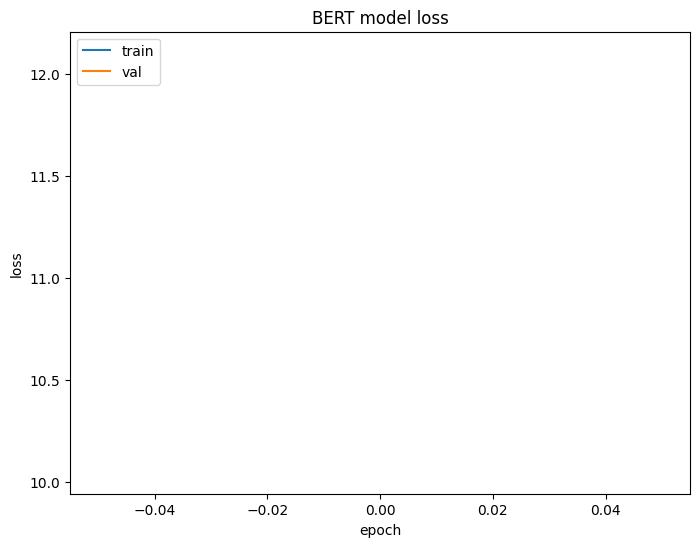

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BERT model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

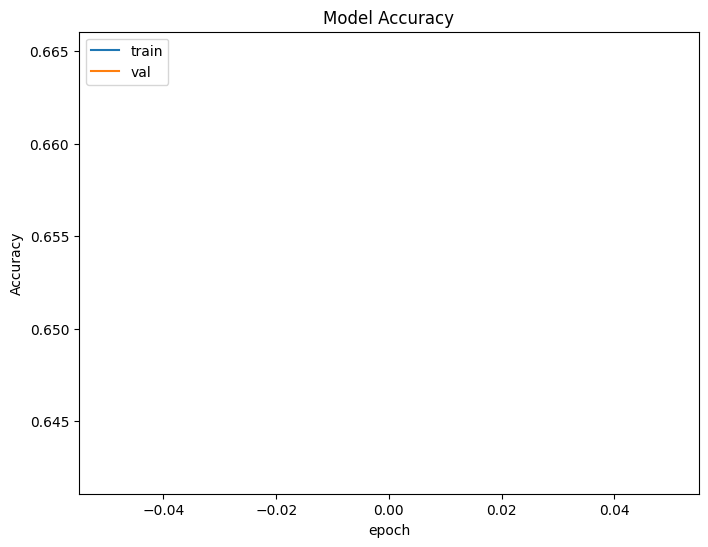

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Train data

Testing the classification on balanced training and validation data

In [ ]:
train_data_temp.shape

(408038, 8)

In [ ]:
train_test = encode_text(train_data_temp['question1'].tolist(), tokenizer)
train_test_2 = encode_text(train_data_temp['question2'].tolist(), tokenizer)

In [ ]:
y_combined = train_data_temp['is_duplicate'].values

In [ ]:
y_combined.shape

(408038,)

## Optimal threshold

In [ ]:
# Predict on the combined train + validation dataset
y_pred_train = model.predict([
    np.asarray(train_test['input_ids']),
    np.asarray(train_test['attention_masks']),
    np.asarray(train_test_2['input_ids']),
    np.asarray(train_test_2['attention_masks'])
])

from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, accuracy_score

# Compute ROC curve to find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_combined, y_pred_train)

# Find the threshold that maximizes the TPR - FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (ROC): {optimal_threshold}")

# Apply the optimal threshold to predictions
y_pred_optimal = (y_pred_train >= optimal_threshold).astype(int)

# Evaluate model performance at the optimal threshold
accuracy = accuracy_score(y_combined, y_pred_optimal)
f1 = f1_score(y_combined, y_pred_optimal)
print(f"Accuracy at Optimal Threshold: {accuracy}")
print(f"F1 Score at Optimal Threshold: {f1}")

# Threshold predictions
y_pred_train = (y_pred_train >= optimal_threshold).astype(int)


12752/12752 ━━━━━━━━━━━━━━━━━━━━ 153s 10ms/step
Optimal Threshold (ROC): 0.6713517308235168
Accuracy at Optimal Threshold: 0.6980991966434499
F1 Score at Optimal Threshold: 0.7290538980105794


In [ ]:
y_pred_train.shape

(408038, 1)

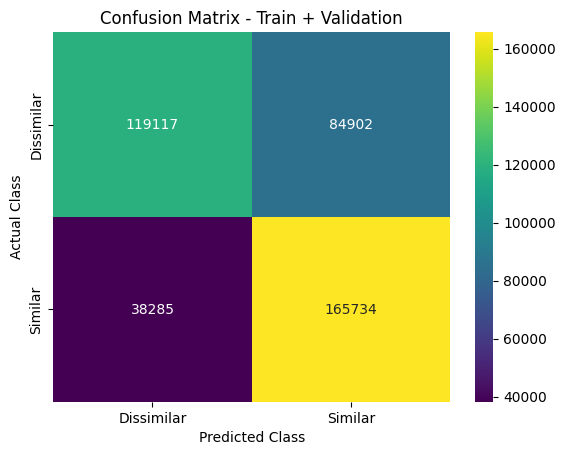

              precision    recall  f1-score   support

  Dissimilar       0.76      0.58      0.66    204019
     Similar       0.66      0.81      0.73    204019

    accuracy                           0.70    408038
   macro avg       0.71      0.70      0.69    408038
weighted avg       0.71      0.70      0.69    408038



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Generate confusion matrix heatmap
conf_matrix = confusion_matrix(y_combined, y_pred_train)

sns.heatmap(conf_matrix, cmap='viridis', annot=True, fmt='d',
            xticklabels=['Dissimilar', 'Similar'], yticklabels=['Dissimilar', 'Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Train + Validation')
plt.show()

# Classification report
print(classification_report(y_combined, y_pred_train, target_names=['Dissimilar', 'Similar']))


### Test data

In [ ]:
y_pred = model.predict((np.asarray(X1_test['input_ids']),np.asarray(X1_test['attention_masks']),np.asarray(X2_test['input_ids']),np.asarray(X2_test['attention_masks'])))

2527/2527 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step


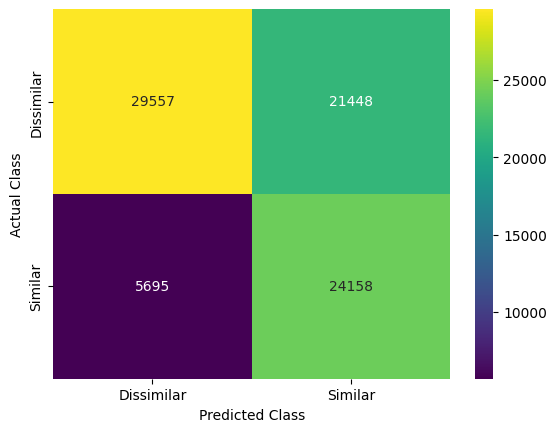

In [ ]:

y_pred[y_pred>=optimal_threshold] = 1
y_pred[y_pred<optimal_threshold] = 0

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.5g',
            xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69     51005
           1       0.53      0.81      0.64     29853

    accuracy                           0.66     80858
   macro avg       0.68      0.69      0.66     80858
weighted avg       0.72      0.66      0.67     80858



## Test CSV file

In [ ]:
test_model_data = load_test.sample(10)

In [ ]:
test_model_data

test_id                                          question1  \
885542    885542                    Are work in foreign countries ?   
2247997  2247997  What are the is "Japan's Marine Day" unknown i...   
533458    533458  Is there any advantage of going to your dealer...   
1775247  1775247  Why do we have to experience failures before l...   
1028674  1028674  Which silencer is the best for a Royal Enfield...   
1181567  1181567  What are some Non software companies expected ...   
1348145  1348145     How blues I improve my communication skill in?   
1767847  1767847                How people earn money from YouTube?   
1253692  1253692  Who is the are the best dental clinics in Mumbai?   
1207781  1207781                    How can the penis due enlarged?   

                                                 question2  
885542          How do I work chemistry a foreign country?  
2247997         Why is "Japan's Marine Day" unknown Haiti?  
533458   How long does it take to get oil changed for d...  
1775247                       What is you achieve failure?  
1028674  How do I increase mileage of a Royal Enfield B...  
1181567  When TCS go for campus recuitment what exactly...  
1348145  What do can I improve my communication skills?...  
1767847          What is the can we earn money on YouTube?  
1253692   What are the most famous isro clinics in Mumbai?  
1207781                  How can a penis decrease in size?

In [ ]:
test_model_data.to_csv('test_10_samples.csv', index=False)

In [ ]:
results = []
for ind in test_model_data.index:
    inputs1 = tokenizer(test_model_data['question1'][ind], return_tensors='tf', padding=True, truncation=True)
    inputs2 = tokenizer(test_model_data['question2'][ind], return_tensors='tf', padding=True, truncation=True)

    # Extract input IDs and attention masks
    input_ids1 = inputs1['input_ids']
    attention_mask1 = inputs1['attention_mask']
    input_ids2 = inputs2['input_ids']
    attention_mask2 = inputs2['attention_mask']

    prediction = model.predict([input_ids1, attention_mask1, input_ids2, attention_mask2])

    prection_text = ''
    if prediction[0][0] <= optimal_threshold:
        prection_text = 'Not Similar'
    else:
        prection_text = 'Simillar'

    results.append((test_model_data['question1'][ind], test_model_data['question2'][ind], prection_text))

In [ ]:
from IPython.display import HTML

In [ ]:
df = pd.DataFrame(results, columns=['First Sentence', 'Second Sentence', 'Predicted Output'])
display(HTML(df.to_html(index=False)))